# Online Advertisement Evaluation for TVs

Let's evaluate some online ads options to pick the best one.

In [1]:
import json
import sys
sys.path.insert(0, '..')

import matplotlib.pyplot as plt
import json
import sys
sys.path.insert(0, '..')

from dotenv import load_dotenv

load_dotenv()

import tinytroupe
from tinytroupe.agent import TinyPerson
from tinytroupe.environment import TinyWorld
from tinytroupe.examples import create_lisa_the_data_scientist, create_oscar_the_architect
from tinytroupe.factory import TinyPersonFactory

from tinytroupe.extraction import ResultsExtractor


!!!!
DISCLAIMER: TinyTroupe relies on Artificial Intelligence (AI) models to generate content. 
The AI models are not perfect and may produce inappropriate or inacurate results. 
For any serious or consequential use, please review the generated content before using it.
!!!!

Looking for default config on: /home/gouri/TinyTroupe/tinytroupe/examples/../tinytroupe/utils/../config.ini
Found custom config on: /home/gouri/TinyTroupe/tinytroupe/examples/config.ini
TinyTroupe version: 0.0.1
Current date and time (local): 2025-08-01 16:19:02
Current date and time (UTC):   2025-08-01 06:19:02

Current TinyTroupe configuration 
[OpenAI]
api_type = azure
azure_openai_key = 354e4e3698fd43389db7cf6759c60380
azure_openai_endpoint = https://uptio-open-ai-us.openai.azure.com/
deployment_id = gpt-4o-mini
azure_api_version = 2024-12-01-preview
model = gpt-4o-mini
reasoning_model = o3-mini
embedding_model = text-embedding-3-small
max_tokens = 16384
temperature = 1.5
freq_penalty = 0.1
presence_penalty = 

## Judging the best ad

Consider the following ads, obtained from real Bing queries.

In [2]:
# User search query: "55 inches tv"

# Ad targeting tech enthusiasts
tv_ad_1 =\
"""
The Ultimate Gaming Experience - LG 4K Ultra HD TV
https://www.lg.com/tv/oled
AdExperience Next-Level Gaming with LG's 4K OLED TV. Unmatched Picture Quality and Ultra-Fast Response Time. Perfect for Gamers and Tech Enthusiasts.

Infinite Contrast · Self-Lighting OLED · Dolby Vision™ IQ · ThinQ AI w/ Magic Remote

Exclusive Gaming Features
LG G2 97" OLED evo TV
Free Gaming Stand w/ Purchase
World's No.1 OLED TV
"""

# Ad targeting families
tv_ad_2 =\
"""
The Perfect Family TV - Samsung 4K & 8K TVs
https://www.samsung.com
AdBring Your Family Together with Samsung's 4K & 8K TVs. Stunning Picture Quality and Family-Friendly Features. Ideal for Movie Nights and Family Gatherings.

Discover Samsung Event · Real Depth Enhancer · Anti-Reflection · 48 mo 0% APR Financing

The 2023 OLED TV Is Here
Samsung Neo QLED 4K TVs
Samsung Financing
Ranked #1 By The ACSI®

Perfect for Family Movie Nights
"""

# Ad targeting budget-conscious shoppers
tv_ad_3 =\
"""
Affordable 55 Inch TV - Wayfair Deals
Shop Now
https://www.wayfair.com/furniture/free-shipping
AdGet the Best Deals on 55 Inch TVs at Wayfair. High-Quality TVs at Budget-Friendly Prices. Free Shipping on All Orders Over $35.

Affordable Prices · Great Deals · Free Shipping
"""

Let's build a request for our agents to pick the best ad.

In [3]:
eval_request_msg = \
f"""
Can you evaluate these Bing ads for me? Which one convices you more to buy their particular offering? 
Select **ONLY** one. Please explain your reasoning, based on your financial situation, background and personality.

# AD 1
```
{tv_ad_1}
```

# AD 2
```
{tv_ad_2}
```

# AD 3
```
{tv_ad_3}
```
"""

print(eval_request_msg)


Can you evaluate these Bing ads for me? Which one convices you more to buy their particular offering? 
Select **ONLY** one. Please explain your reasoning, based on your financial situation, background and personality.

# AD 1
```

The Ultimate Gaming Experience - LG 4K Ultra HD TV
https://www.lg.com/tv/oled
AdExperience Next-Level Gaming with LG's 4K OLED TV. Unmatched Picture Quality and Ultra-Fast Response Time. Perfect for Gamers and Tech Enthusiasts.

Infinite Contrast · Self-Lighting OLED · Dolby Vision™ IQ · ThinQ AI w/ Magic Remote

Exclusive Gaming Features
LG G2 97" OLED evo TV
Free Gaming Stand w/ Purchase
World's No.1 OLED TV

```

# AD 2
```

The Perfect Family TV - Samsung 4K & 8K TVs
https://www.samsung.com
AdBring Your Family Together with Samsung's 4K & 8K TVs. Stunning Picture Quality and Family-Friendly Features. Ideal for Movie Nights and Family Gatherings.

Discover Samsung Event · Real Depth Enhancer · Anti-Reflection · 48 mo 0% APR Financing

The 2023 OLED TV Is 

Let's also have a reason for them to require a new TV.

In [4]:
situation = "Your TV broke and you need a new one. You search for a new TV on Bing."

### Try with standard agents

To begin with, let's pick a pre-defined agent and ask him or her to perform the evaluations. To make it easier to change the chosen agent, we assign it to a variable first.

In [5]:
TinyPerson.all_agents

{}

In [6]:
lisa = create_lisa_the_data_scientist()

In [7]:
lisa.change_context(situation)

In [8]:
lisa.listen_and_act(eval_request_msg)

USER --> Lisa Carter: [CONVERSATION] 
          >  Can you evaluate these Bing ads for me? Which one convices you more to buy their
          > particular offering?  Select **ONLY** one. Please explain your reasoning, based on your
          > financial situation, background and personality.  # AD 1 ```  The Ultimate Gaming
          > Experience - LG 4K Ultra HD TV https://www.lg.com/tv/oled AdExperience Next-Level Gaming
          > with LG's 4K OLED TV. Unmatched Picture Quality and Ultra-Fast Response Time. Perfect
          > for Gamers and Tech Enthusiasts.  Infinite Contrast · Self-Lighting OLED · Dolby Vision™
          > IQ · ThinQ AI w/ Magic Remote  Exclusive Gaming Features LG G2 97" OLED evo TV Free
          > Gaming Stand w/ Purchase World's No.1 OLED TV  ```  # AD 2 ```  The Perfect Family TV -
          > Samsung 4K & 8K TVs https://www.samsung.com AdBring Your Family Together with Samsung's
          > 4K & 8K TVs. Stunning Picture Quality and Family-Friendly Features. Ideal for Movie
          > Nights and Family Gatherings.  Discover Samsung Event · Real Depth Enhancer · Anti-
          > Reflection · 48 mo 0% APR Financing  The 2023 OLED TV Is Here Samsung Neo QLED 4K (...)

Lisa Carter acts: [THINK] 
                 > I need to evaluate the three ads based on my financial situation, background, and
                 > personality. I should consider which ad resonates with me the most and why. Given
                 > my interest in technology and data science, I might lean towards the LG 4K Ultra
                 > HD TV ad, as it emphasizes advanced features and quality, which aligns with my
                 > analytical nature. However, I also value family time, so the Samsung ad could
                 > appeal to that aspect. The Wayfair ad is more budget-friendly, but it may not
                 > excite me as much as the others. I need to weigh these factors carefully before
                 > making a decision.

Lisa Carter acts: [THINK] 
                 > After considering the ads, I find that the LG 4K Ultra HD TV ad appeals to me the
                 > most. It highlights advanced features like unmatched picture quality and ultra-
                 > fast response time, which are important for someone like me who values technology
                 > and quality. The emphasis on gaming features also resonates with my analytical
                 > mindset, as I appreciate products that enhance user experience through
                 > innovation. While the Samsung ad focuses on family gatherings, which I value, it
                 > doesn't excite me as much as the LG ad. The Wayfair ad is budget-friendly, but it
                 > lacks the advanced features that I look for in a TV. Therefore, I would choose
                 > the LG ad for its technological appeal and quality.

Lisa Carter acts: [TALK] 
                 > After evaluating the ads, I find that the LG 4K Ultra HD TV ad convinces me the
                 > most. It emphasizes advanced features like unmatched picture quality and ultra-
                 > fast response time, which are crucial for someone who values technology and
                 > quality. The focus on gaming features resonates with my analytical mindset, as I
                 > appreciate products that enhance user experience through innovation. While the
                 > Samsung ad highlights family gatherings, which I value, it doesn't excite me as
                 > much as the LG ad. The Wayfair ad is budget-friendly but lacks the advanced
                 > features I look for in a TV. Therefore, I would choose the LG ad for its
                 > technological appeal and quality.

Lisa Carter acts: [DONE] 

Let's extract from the agent's interaction the best ad chosen. In this manner, we can easily process results later.

In [9]:
extractor = ResultsExtractor()

extraction_objective="Find the ad the agent chose. Extract the Ad number and title."

res = extractor.extract_results_from_agent(lisa, 
                          extraction_objective=extraction_objective,
                          situation=situation,
                          fields=["ad_number", "ad_title"],
                          verbose=True)

res

Extraction raw result message: {'content': '{"ad_number": "AD 1", "ad_title": "The Ultimate Gaming Experience - LG 4K Ultra HD TV"}', 'refusal': None, 'role': 'assistant', 'annotations': []}


{'ad_number': 'AD 1',
 'ad_title': 'The Ultimate Gaming Experience - LG 4K Ultra HD TV'}

We can then easily get the ad number and title from the results:

In [10]:
f"{res['ad_number']}: {res['ad_title']}"

'AD 1: The Ultimate Gaming Experience - LG 4K Ultra HD TV'

### Try with agents generated on the fly too

We don't really need to spend a lot of time customizing agents. We can create them on the fly from simple descriptions.

In [11]:
population_size = 30

In [12]:
factory = TinyPersonFactory.create_factory_from_demography("./information/populations/usa.json", 
                                                           population_size=population_size,
                                                           context=situation)

In [13]:
people = factory.generate_people(population_size, verbose=True)

In [14]:
target_audience = TinyWorld(f"Target audience", people, broadcast_if_no_target=False)
target_audience.broadcast(eval_request_msg)
target_audience.run(1)


USER --> Lillian Chen-Patel: [CONVERSATION] 
          >  Can you evaluate these Bing ads for me? Which one convices you more to buy their
          > particular offering?  Select **ONLY** one. Please explain your reasoning, based on your
          > financial situation, background and personality.  # AD 1 ```  The Ultimate Gaming
          > Experience - LG 4K Ultra HD TV https://www.lg.com/tv/oled AdExperience Next-Level Gaming
          > with LG's 4K OLED TV. Unmatched Picture Quality and Ultra-Fast Response Time. Perfect
          > for Gamers and Tech Enthusiasts.  Infinite Contrast · Self-Lighting OLED · Dolby Vision™
          > IQ · ThinQ AI w/ Magic Remote  Exclusive Gaming Features LG G2 97" OLED evo TV Free
          > Gaming Stand w/ Purchase World's No.1 OLED TV  ```  # AD 2 ```  The Perfect Family TV -
          > Samsung 4K & 8K TVs https://www.samsung.com AdBring Your Family Together with Samsung's
          > 4K & 8K TVs. Stunning Picture Quality and Family-Friendly Features. Ideal for Movie
          > Nights and Family Gatherings.  Discover Samsung Event · Real Depth Enhancer · Anti-
          > Reflection · 48 mo 0% APR Financing  The 2023 OLED TV Is Here Samsung Neo QLED 4K (...)

       + --> Richard Hargrove

       + --> Javier Cruz-Moreno

       + --> ...others...

─────────────────────────────────────────── Target audience step 1 of 1 ───────────────────────────────────────────

Daniel Prescott acts: [THINK] 
                     > I need to evaluate the ads based on my financial situation, background, and
                     > personality. As a social worker, I value affordability and practicality, but
                     > I also appreciate quality and features that enhance family experiences. I
                     > should consider which ad aligns best with my values and current financial
                     > situation.

Eugene Whitaker acts: [THINK] 
                     > Looking at these ads, I need to consider my financial situation and what I
                     > value in a TV. I'm retired and on a fixed income, so affordability is key. I
                     > also enjoy spending time with family, so a TV that brings us together for
                     > movie nights is appealing. The Samsung ad emphasizes family-friendly features
                     > and financing options, which could be helpful. The LG ad seems more focused
                     > on gaming, which isn't my priority. The Wayfair ad offers affordability but
                     > lacks the family aspect. Overall, I think the Samsung ad resonates with me
                     > the most because it aligns with my values of family and quality time
                     > together.

Aaliyah Johnson-Rivera acts: [THINK] 
                            > I need to evaluate the ads based on my financial situation,
                            > background, and personality. I should consider which ad resonates with
                            > me the most and why. I am a graphic designer who values creativity and
                            > quality, and I often think about how products can enhance my lifestyle
                            > and work. I also have a tendency to be budget-conscious, so
                            > affordability is important to me. I should weigh the features of each
                            > ad against my preferences and needs.

Javier Cruz-Moreno acts: [THINK] 
                        > I need to evaluate the ads based on my financial situation and
                        > personality. I have a limited budget, so affordability is important. I
                        > also enjoy gaming and spending time with friends, which makes me lean
                        > towards options that cater to those interests. The LG ad highlights
                        > features for gamers, which is appealing, but it's likely more expensive.
                        > The Samsung ad focuses on family gatherings, which isn't as relevant to
                        > me. The Wayfair ad offers affordability, which aligns with my current
                        > financial constraints. I think I would choose the Wayfair ad for its
                        > budget-friendly approach.

Nathaniel Brooks acts: [THINK] 
                      > I need to evaluate the ads based on my financial situation, background, and
                      > personality. As a social worker, I value affordability and practicality,
                      > especially since I often work with families in need. I also appreciate
                      > quality and features that enhance family experiences. The LG ad focuses on
                      > gaming, which isn't my priority, while the Samsung ad emphasizes family
                      > gatherings, which resonates with me. The Wayfair ad offers affordability but
                      > lacks the emotional appeal of family connection. Therefore, I should lean
                      > towards the Samsung ad for its family-friendly features and financing
                      > options.

Richard Hargrove acts: [THINK] 
                      > Looking at the ads, I need to consider my financial situation and what I
                      > value in a TV. The LG ad is focused on gaming, which doesn't appeal to me
                      > since I'm not a gamer. The Samsung ad emphasizes family gatherings and movie
                      > nights, which resonates with me as I enjoy spending time with my family. The
                      > Wayfair ad offers affordability, which is important given my retirement
                      > budget. However, I think the Samsung TV would be the best choice for me
                      > because it aligns with my values of family and togetherness, even if it
                      > might be pricier. I appreciate quality and features that enhance family
                      > experiences.

Lillian Chen-Patel acts: [THINK] 
                        > I need to evaluate the three ads based on my financial situation,
                        > background, and personality. I should consider which ad resonates with me
                        > the most and why. As a healthcare practitioner, I value quality and
                        > reliability, but I also have a family and appreciate products that enhance
                        > our time together. I should weigh the features of each ad against my
                        > priorities.

Sofia Ramirez-Patel acts: [THINK] 
                         > I need to evaluate the ads based on my financial situation, background,
                         > and personality. I am a graphic designer who values creativity and
                         > quality in products. I also have a tendency to prioritize budget-friendly
                         > options, but I appreciate high-quality design and technology. Let's
                         > analyze each ad:   - **AD 1**: The LG 4K Ultra HD TV ad appeals to my
                         > tech-savvy side and love for high-quality visuals, but it might be too
                         > expensive for my current budget as a freelancer with inconsistent income.
                         > - **AD 2**: The Samsung ad focuses on family gatherings, which is nice,
                         > but I don't have a family of my own yet, so it doesn't resonate with me
                         > as much.  - **AD 3**: The Wayfair ad is budget-friendly and emphasizes
                         > affordability, which aligns with my current financial situation.
                         > Considering all this, I think AD 3 is the most convincing for me because
                         > it offers a practical solution that fits my budget while still providing
                         > quality.

Nathaniel Brooks acts: [TALK] 
                      > I would choose the Samsung ad for the Perfect Family TV. It emphasizes
                      > bringing families together, which aligns with my values as a social worker.
                      > The stunning picture quality and family-friendly features are appealing for
                      > movie nights and gatherings, which are important to me. Plus, the financing
                      > options make it more accessible for families who might be struggling
                      > financially. Overall, it resonates with my background and personality,
                      > focusing on community and family connections.

Eugene Whitaker acts: [TALK] 
                     > I think the Samsung ad convinces me the most to buy their offering. It
                     > emphasizes family-friendly features, which is important to me as I enjoy
                     > spending time with my family. The idea of having a TV that brings us together
                     > for movie nights is appealing. Plus, the financing options make it more
                     > accessible for someone on a fixed income like me. While the LG ad focuses on
                     > gaming, that's not my priority, and the Wayfair ad, although affordable,
                     > doesn't highlight the family aspect that I value. So, overall, Samsung's
                     > offering aligns best with my needs and values.

Aaliyah Johnson-Rivera acts: [THINK] 
                            > Looking at the ads, I feel that AD 1 for the LG 4K Ultra HD TV stands
                            > out to me the most. As a graphic designer, I appreciate high-quality
                            > visuals and the promise of unmatched picture quality and ultra-fast
                            > response time is very appealing. The emphasis on gaming features also
                            > resonates with my creative side, as I often look for technology that
                            > enhances my work and leisure experiences. However, I need to consider
                            > my financial situation; while the LG TV seems like a premium product,
                            > I should also think about whether I can afford it without compromising
                            > my budget. AD 2 from Samsung is appealing for family gatherings, but I
                            > don't prioritize family features as much as individual quality. AD 3
                            > from Wayfair is budget-friendly, but it lacks the excitement and
                            > quality that I seek in a TV. Overall, AD 1 aligns best with my
                            > personality and professional needs, even if it might be a stretch
                            > financially.

Richard Hargrove acts: [TALK] 
                      > I think the Samsung ad convinces me the most to buy their offering. It
                      > emphasizes family togetherness and movie nights, which is important to me.
                      > While the LG ad focuses on gaming, I'm not really into that. The Wayfair ad
                      > offers affordability, but I value quality and features that enhance family
                      > experiences. So, I'd go with the Samsung TV for its family-friendly features
                      > and stunning picture quality.

Javier Cruz-Moreno acts: [TALK] 
                        > I would choose the Wayfair ad for the Affordable 55 Inch TV. Given my
                        > financial situation, affordability is a key factor for me. The Wayfair ad
                        > emphasizes budget-friendly prices and free shipping, which is appealing.
                        > While the LG ad has great features for gaming, it likely comes with a
                        > higher price tag that I can't afford right now. The Samsung ad focuses on
                        > family gatherings, which isn't as relevant to my current lifestyle. So,
                        > Wayfair's offer aligns best with my needs and budget.

Lillian Chen-Patel acts: [THINK] 
                        > After considering the ads, I find that AD 2, the Samsung 4K & 8K TVs,
                        > resonates with me the most. As a healthcare practitioner, I value quality
                        > and reliability, and the emphasis on family-friendly features appeals to
                        > my desire to create memorable moments with my family. The mention of
                        > stunning picture quality and the ideal setup for family movie nights
                        > aligns with my interests in spending quality time with my loved ones.
                        > Additionally, the financing option is attractive as it makes it easier to
                        > manage expenses while still investing in a quality product.

Nathaniel Brooks acts: [DONE] 

Eugene Whitaker acts: [DONE] 

Daniel Prescott acts: [THINK] 
                     > After considering the ads, I realize that while the LG 4K Ultra HD TV offers
                     > impressive features for gaming, it may not be the best fit for my current
                     > financial situation. The Samsung ad emphasizes family togetherness and movie
                     > nights, which resonates with my values as a family-oriented person. However,
                     > the Wayfair ad stands out to me because it focuses on affordability and
                     > budget-friendly options, which is crucial for my financial situation as a
                     > social worker. Therefore, I believe the Wayfair ad is the most convincing for
                     > me.

Sofia Ramirez-Patel acts: [TALK] 
                         > After evaluating the ads, I find AD 3, the Wayfair ad for the affordable
                         > 55 Inch TV, to be the most convincing. It emphasizes budget-friendly
                         > prices and free shipping, which aligns with my current financial
                         > situation as a freelance graphic designer. While I appreciate high-
                         > quality visuals and technology, I need to prioritize affordability right
                         > now. The other ads, particularly AD 1 for the LG TV, are appealing but
                         > likely out of my budget. So, I would choose AD 3 for its practicality and
                         > value.

Javier Cruz-Moreno acts: [DONE] 

Lillian Chen-Patel acts: [TALK] 
                        > I would choose AD 2, the Samsung 4K & 8K TVs. It appeals to me because it
                        > emphasizes family-friendly features and stunning picture quality, which is
                        > perfect for our family movie nights. As a healthcare practitioner, I value
                        > quality and reliability, and this ad aligns with my desire to create
                        > memorable moments with my loved ones. Plus, the financing option makes it
                        > easier to manage expenses while investing in a quality product.

Richard Hargrove acts: [DONE] 

Sofia Ramirez-Patel acts: [DONE] 

Lillian Chen-Patel acts: [DONE] 

Daniel Prescott acts: [TALK] 
                     > After evaluating the ads, I find the Wayfair ad for the affordable 55 Inch TV
                     > to be the most convincing. It emphasizes budget-friendly prices and free
                     > shipping, which aligns with my financial situation as a social worker. While
                     > the LG and Samsung ads offer impressive features, they may not be practical
                     > for my current budget. The Wayfair ad speaks to my values of affordability
                     > and practicality, making it the best choice for me.

Aaliyah Johnson-Rivera acts: [TALK] 
                            > I would choose AD 1 for the LG 4K Ultra HD TV. As a graphic designer,
                            > the unmatched picture quality and ultra-fast response time really
                            > appeal to me. I value high-quality visuals, and this TV seems perfect
                            > for both my work and gaming. Although it might be a bit of a stretch
                            > financially, the features it offers align with my creative needs. AD 2
                            > is nice for family gatherings, but I prioritize individual quality
                            > over family features. AD 3 is budget-friendly, but it lacks the
                            > excitement I seek in a TV.

Elena Rodriguez-Smith acts: [THINK] 
                           > I need to evaluate the ads based on my financial situation, background,
                           > and personality. I should consider which ad resonates with me the most
                           > and why. I am a graphic designer who values creativity and quality, but
                           > I also have to be mindful of my budget as a freelancer. I enjoy
                           > technology and gaming, but I also appreciate family-oriented products.
                           > Let's break down each ad: 1) LG's ad appeals to my tech-savvy side and
                           > love for gaming, but it might be too expensive. 2) Samsung's ad focuses
                           > on family gatherings, which is nice, but I'm not in a family-oriented
                           > phase right now. 3) Wayfair's ad is budget-friendly, which is appealing
                           > given my inconsistent income. I think I might lean towards the Wayfair
                           > ad for its affordability.

Jessica Lin-Williams acts: [THINK] 
                          > I need to evaluate the ads based on my financial situation, background,
                          > and personality. As a healthcare practitioner, I value quality and
                          > reliability, especially when it comes to technology that can enhance my
                          > home life. I also have a family and enjoy spending time with them, so a
                          > family-friendly option is appealing. However, I also appreciate good
                          > deals and affordability. I should consider which ad resonates most with
                          > my values and current needs.

Maya Chen-Scott acts: [THINK] 
                     > I need to evaluate the three ads based on my financial situation, background,
                     > and personality. I should consider which ad resonates with me the most and
                     > why. I have a preference for quality and value, especially when it comes to
                     > technology. I also value family time and experiences, so that might influence
                     > my choice as well. Let's analyze each ad:   - **Ad 1**: The LG 4K Ultra HD TV
                     > ad appeals to my interest in high-quality technology and gaming. However, it
                     > might be on the pricier side, which could be a concern given my budget.  -
                     > **Ad 2**: The Samsung TV ad emphasizes family gatherings and movie nights,
                     > which aligns with my values of spending time with loved ones. The financing
                     > option is also attractive, making it more accessible.  - **Ad 3**: The
                     > Wayfair ad focuses on affordability, which is appealing if I'm looking for a
                     > budget-friendly option. However, it lacks the premium features that I might
                     > desire in a TV.   Considering all this, I think Ad 2 is the most convincing
                     > for me because it combines quality w (...)

Daniel Prescott acts: [DONE] 

Aaliyah Johnson-Rivera acts: [DONE] 

Maya Chen-Scott acts: [TALK] 
                     > After evaluating the ads, I find that the Samsung 4K & 8K TV ad is the most
                     > convincing for me. It emphasizes family togetherness, which is important to
                     > me, especially for movie nights and gatherings. The stunning picture quality
                     > and family-friendly features resonate with my values. Additionally, the
                     > financing option makes it more accessible given my financial situation.
                     > Overall, it aligns well with my priorities and lifestyle.

Henry Caldwell-James acts: [THINK] 
                          > Looking at the ads, I need to consider my financial situation and what I
                          > value in a TV. The LG ad is focused on gaming, which doesn't appeal to
                          > me as much since I'm not a gamer. The Samsung ad emphasizes family
                          > gatherings and movie nights, which resonates with me because I enjoy
                          > spending time with my family. The Wayfair ad offers affordability, but I
                          > prefer quality over just low prices. Given my values and the importance
                          > of family time, I think the Samsung ad would convince me the most to buy
                          > a TV.

Thomas Caldwell acts: [THINK] 
                     > I need to evaluate the ads based on my financial situation, background, and
                     > personality. I should consider which ad resonates with me the most and why.
                     > Given my focus on community and family, I might lean towards an ad that
                     > emphasizes family values or affordability. The Samsung ad highlights family
                     > gatherings, which aligns with my values, but the Wayfair ad offers
                     > affordability, which is also important. I need to weigh these factors
                     > carefully before making a decision.

Maya Chen-Scott acts: [DONE] 

Henry Caldwell-James acts: [TALK] 
                          > I think the Samsung ad convinces me the most to buy a TV. It emphasizes
                          > family gatherings and movie nights, which are important to me. I value
                          > spending time with my family, and a good TV can enhance those moments.
                          > The features they mention, like stunning picture quality and family-
                          > friendly options, really resonate with my lifestyle. Plus, the financing
                          > option makes it more accessible for my budget.

Thomas Caldwell acts: [TALK] 
                     > After evaluating the ads, I would choose AD 2, the Samsung 4K & 8K TVs. The
                     > reason is that it emphasizes family togetherness, which resonates with my
                     > values of community and connection. I appreciate the focus on family-friendly
                     > features and the idea of movie nights, as I often enjoy spending time with my
                     > loved ones. While affordability is important, I believe investing in a
                     > quality TV that enhances family experiences is worth it. Plus, the financing
                     > option makes it more accessible for my budget.

Elena Rodriguez-Smith acts: [TALK] 
                           > After evaluating the ads, I would choose the Wayfair ad for the
                           > affordable 55 Inch TV. As a freelance graphic designer, I often have to
                           > be mindful of my budget, and this ad highlights high-quality TVs at
                           > budget-friendly prices, which is really appealing to me. The free
                           > shipping offer is also a nice bonus. While the LG ad is tempting with
                           > its gaming features, I can't justify the expense right now. The Samsung
                           > ad is family-oriented, but I'm not in that phase of my life currently.
                           > So, Wayfair's focus on affordability aligns best with my financial
                           > situation and personality.

Alyssa Martinez-Young acts: [THINK] 
                           > I need to evaluate the three ads based on my financial situation,
                           > background, and personality. I should consider which ad resonates with
                           > me the most and why. I am a graphic designer who values creativity and
                           > affordability, and I often look for deals that fit my budget. I also
                           > appreciate quality and features that enhance my experience, especially
                           > in art and design. Let's analyze each ad:   - **AD 1**: The LG 4K Ultra
                           > HD TV ad appeals to my interest in high-quality visuals and technology,
                           > but it might be too expensive for my current financial situation as a
                           > freelancer. - **AD 2**: The Samsung ad focuses on family and
                           > gatherings, which is nice, but I don't prioritize family features as
                           > much since I live alone. The financing option is appealing, but again,
                           > it might be out of my budget. - **AD 3**: The Wayfair ad emphasizes
                           > affordability and free shipping, which aligns with my current financial
                           > constraints. It offers a practical solution without breaking the bank.
                           > Considering all this, AD 3 seems to be the most  (...)

Thomas Caldwell acts: [DONE] 

Elena Rodriguez-Smith acts: [DONE] 

David Thompson acts: [THINK] 
                    > I need to evaluate the ads based on my financial situation, background, and
                    > personality. As a social worker, I value practicality and affordability,
                    > especially since I often work with families in need. I also appreciate quality
                    > and features that enhance family experiences. I should consider which ad
                    > aligns best with these values.

Alyssa Martinez-Young acts: [TALK] 
                           > After evaluating the ads, I find AD 3, the Wayfair ad for the
                           > affordable 55 Inch TV, to be the most convincing. It emphasizes budget-
                           > friendly prices and free shipping, which aligns perfectly with my
                           > current financial situation as a freelance graphic designer. While the
                           > LG and Samsung ads highlight impressive features, they may be out of my
                           > budget. I appreciate quality, but affordability is my priority right
                           > now. So, I would choose the Wayfair ad for its practicality and value.

Jessica Lin-Williams acts: [THINK] 
                          > After considering the ads, I find that AD 2, the Samsung 4K & 8K TVs,
                          > resonates with me the most. It emphasizes family togetherness, which is
                          > important to me as I value spending quality time with my loved ones. The
                          > stunning picture quality and family-friendly features appeal to my
                          > desire for a good viewing experience during movie nights. Additionally,
                          > the financing option makes it more accessible given my financial
                          > situation, allowing me to invest in a quality product without immediate
                          > financial strain. Overall, this ad aligns well with my priorities and
                          > lifestyle.

Julian Castillo acts: [THINK] 
                     > Evaluating the ads, I need to consider my financial situation and interests.
                     > I am currently unemployed and looking for budget-friendly options. The LG ad
                     > is appealing due to its advanced features, but it's likely expensive. The
                     > Samsung ad seems family-oriented, which doesn't resonate with me as much
                     > since I'm more into gaming. The Wayfair ad stands out because it emphasizes
                     > affordability and free shipping, which aligns with my current financial
                     > constraints and desire for a good deal. I think I would choose the Wayfair ad
                     > for its budget-friendly approach and practicality.

Alyssa Martinez-Young acts: [DONE] 

Ariana Lopez-Smith acts: [THINK] 
                        > I need to evaluate the three ads based on my financial situation,
                        > background, and personality. I am a freelance graphic designer, so I
                        > appreciate quality and creativity in products. My financial situation is
                        > somewhat tight due to inconsistent income, so I tend to lean towards more
                        > affordable options. However, I also value experiences and quality,
                        > especially when it comes to technology that enhances my creative work or
                        > leisure time. I should consider which ad resonates with my values and
                        > needs the most.

Jessica Lin-Williams acts: [TALK] 
                          > I believe AD 2, the Samsung 4K & 8K TVs, is the most convincing for me.
                          > It highlights family togetherness, which is important to me. The
                          > stunning picture quality and family-friendly features are appealing for
                          > our movie nights. Plus, the financing option makes it more accessible
                          > given my financial situation. Overall, it aligns well with my priorities
                          > and lifestyle.

David Thompson acts: [THINK] 
                    > After considering the ads, I realize that while the LG 4K Ultra HD TV offers
                    > impressive features for gamers, it may not be the most practical choice for my
                    > financial situation. The Samsung ad appeals to family gatherings, which
                    > resonates with my values of community and family. However, the Wayfair ad
                    > stands out as it emphasizes affordability and budget-friendly options, which
                    > is crucial for someone like me who often prioritizes cost-effectiveness.
                    > Therefore, I think I would choose the Wayfair ad for its focus on
                    > affordability and practicality.

Julian Castillo acts: [TALK] 
                     > I would choose the Wayfair ad for the Affordable 55 Inch TV. It really
                     > appeals to me because I'm currently unemployed and looking for budget-
                     > friendly options. The emphasis on high-quality TVs at affordable prices and
                     > free shipping is exactly what I need right now. The LG and Samsung ads, while
                     > impressive, seem out of my financial reach, and I'm more focused on
                     > practicality than luxury at the moment.

Dante Morales-Smith acts: [THINK] 
                         > Evaluating the ads based on my financial situation and interests, I need
                         > to consider what appeals to me as a gamer and someone who enjoys cooking.
                         > The LG 4K Ultra HD TV ad stands out because it emphasizes features that
                         > enhance gaming experiences, which is important to me. However, the price
                         > might be a concern since I'm currently unemployed and looking for
                         > affordable options. The Wayfair ad offers budget-friendly prices, which
                         > is appealing given my financial constraints. But I also want a good
                         > quality TV for gaming. I think I would lean towards the LG ad for its
                         > gaming features, but I need to be cautious about spending too much.
                         > Overall, I feel torn between wanting quality and needing to save money.

Henry Caldwell-James acts: [DONE] 

Jessica Lin-Williams acts: [DONE] 

Julian Castillo acts: [DONE] 

Ariana Lopez-Smith acts: [THINK] 
                        > After considering the ads, I realize that AD 3, the Wayfair Deals ad,
                        > appeals to me the most. As a freelance graphic designer, I often have to
                        > be mindful of my budget, and this ad emphasizes affordability and great
                        > deals, which is crucial for my financial situation. While the LG and
                        > Samsung ads highlight high-end features and quality, they may not be
                        > practical for me right now. I appreciate the focus on budget-friendly
                        > options in AD 3, which aligns with my current needs and values.

David Thompson acts: [TALK] 
                    > After evaluating the ads, I would choose the Wayfair ad for the affordable 55
                    > Inch TV. It emphasizes budget-friendly prices and free shipping, which aligns
                    > with my financial situation and values as a social worker. I appreciate
                    > practicality and affordability, especially when considering the needs of
                    > families. The other ads, while appealing in their own ways, do not prioritize
                    > cost as much as the Wayfair option does.

Camila Torres-James acts: [THINK] 
                         > I need to evaluate the ads based on my financial situation, background,
                         > and personality. I should consider which ad resonates with me the most
                         > and why. I am a graphic designer who values creativity and quality, and I
                         > often look for products that enhance my work and personal life. I also
                         > care about affordability, especially since I freelance and manage my own
                         > finances. I should weigh the features of each ad against my preferences
                         > and needs.

David Thompson acts: [DONE] 

Walter Harrison acts: [THINK] 
                     > Looking at the ads, I need to consider my financial situation and what I
                     > value in a TV. The LG ad is focused on gaming, which doesn't appeal to me as
                     > much since I'm not a gamer. The Samsung ad emphasizes family gatherings and
                     > movie nights, which resonates with my values of family and togetherness. The
                     > Wayfair ad offers affordability, but I prefer quality over just low prices.
                     > Given my background and personality, I think the Samsung ad would convince me
                     > the most because it aligns with my priorities of family time and quality
                     > entertainment.

Camila Torres-James acts: [THINK] 
                         > After considering the ads, I find that AD 1, the LG 4K Ultra HD TV,
                         > convinces me the most. As a graphic designer, I appreciate high-quality
                         > visuals and fast response times, which are crucial for both my work and
                         > leisure activities like gaming. The features like Infinite Contrast and
                         > Dolby Vision are appealing, and the emphasis on being perfect for gamers
                         > aligns with my interests. Although the price might be higher than budget
                         > options, the quality justifies the investment for me. I also value the
                         > free gaming stand offer, which adds extra value to the purchase.

Dante Morales-Smith acts: [TALK] 
                         > After evaluating the ads, I think the one that convinces me the most is
                         > the LG 4K Ultra HD TV. The ad highlights features that are perfect for
                         > gaming, like unmatched picture quality and ultra-fast response time,
                         > which really appeals to me as a gamer. However, I also have to consider
                         > my financial situation since I'm currently unemployed. While the Wayfair
                         > ad offers affordable options, I feel like the quality of the LG TV would
                         > enhance my gaming experience significantly. So, even though it's a bit of
                         > a stretch financially, I would lean towards the LG ad for its gaming
                         > features.

Madeline Chen-White acts: [THINK] 
                         > I need to evaluate the three ads based on my financial situation,
                         > background, and personality. I should consider which ad resonates with me
                         > the most and why. I have a strong interest in healthcare and community
                         > engagement, so I might lean towards something that emphasizes family and
                         > community values. However, I also appreciate quality and technology,
                         > especially in healthcare management. I should weigh the features of each
                         > ad carefully before making a decision.

Jamal Rivera acts: [THINK] 
                  > I need to evaluate the ads based on my financial situation and interests. I love
                  > gaming and cooking, but I also have to be mindful of my budget. The LG ad seems
                  > appealing because it focuses on gaming, which I enjoy, but it's likely
                  > expensive. The Samsung ad emphasizes family, which isn't my main focus, and the
                  > Wayfair ad offers affordability, which is important given my financial
                  > struggles. I should choose the ad that aligns with my passion for gaming while
                  > considering my budget.

Dante Morales-Smith acts: [DONE] 

Walter Harrison acts: [TALK] 
                     > I think the Samsung ad convinces me the most. It emphasizes family
                     > togetherness and movie nights, which are important to me. I value quality
                     > time with my family, and a good TV can enhance those moments. The financing
                     > option is also appealing, as it makes it easier to afford a quality product
                     > without breaking the bank. Overall, it aligns well with my priorities and
                     > lifestyle.

Jamal Rivera acts: [TALK] 
                  > After considering the ads, I would choose AD 1, the LG 4K Ultra HD TV. Even
                  > though it might be on the pricier side, the focus on gaming really resonates
                  > with me. The features like unmatched picture quality and ultra-fast response
                  > time are perfect for enhancing my gaming experience. Plus, the free gaming stand
                  > is a nice bonus. I know I need to be careful with my finances, but investing in
                  > something that aligns with my passion for gaming feels worth it. I can always
                  > save up for it!

Robert Mitchell acts: [THINK] 
                     > Looking at the ads, I need to consider my financial situation and what I
                     > value in a TV. The LG ad is focused on gaming, which doesn't appeal to me as
                     > much since I'm not a gamer. The Samsung ad emphasizes family gatherings and
                     > movie nights, which resonates with my values of family time. The Wayfair ad
                     > offers affordability, which is important given my retirement budget. However,
                     > I think the Samsung TV would be the best choice for me because it promotes
                     > family togetherness, and I enjoy watching movies with my family. Plus, the
                     > financing option could help manage costs better.

Madeline Chen-White acts: [THINK] 
                         > After considering the ads, I realize that AD 2, the Samsung 4K & 8K TVs
                         > ad, resonates with me the most. It emphasizes family togetherness, which
                         > aligns with my values of community and connection. The mention of
                         > stunning picture quality and family-friendly features appeals to my
                         > desire for quality in entertainment, especially for family movie nights.
                         > Additionally, the financing option makes it more accessible, which is
                         > important given my focus on affordable healthcare access. Overall, this
                         > ad speaks to my interests and financial considerations.

Camila Torres-James acts: [TALK] 
                         > I believe AD 1, the LG 4K Ultra HD TV, is the most convincing option for
                         > me. As a graphic designer, I value high-quality visuals and fast response
                         > times, which are essential for both my work and gaming. The features like
                         > Infinite Contrast and Dolby Vision are particularly appealing, and the
                         > free gaming stand adds extra value. Although it might be pricier than
                         > budget options, the quality justifies the investment for me.

Ariana Lopez-Smith acts: [TALK] 
                        > I evaluated the ads, and I find AD 3, the Wayfair Deals ad, to be the most
                        > convincing for me. It emphasizes affordability and great deals, which is
                        > essential given my current financial situation as a freelance graphic
                        > designer. While the LG and Samsung ads highlight high-end features, they
                        > may not be practical for me right now. I appreciate the focus on budget-
                        > friendly options in AD 3, aligning with my needs and values.

Jasmine Rivera-Liu acts: [THINK] 
                        > I need to evaluate the three ads based on my financial situation,
                        > background, and personality. I am a graphic designer and art educator, so
                        > I appreciate quality and creativity in products. My financial situation is
                        > moderate, as I work freelance and part-time, so I tend to look for value
                        > in my purchases. I also value family and community, which might influence
                        > my choice.   Ad 1 focuses on high-end gaming features, which might appeal
                        > to tech enthusiasts but could be out of my budget. Ad 2 emphasizes family-
                        > friendly features, which resonates with my values of bringing people
                        > together, but it may also be pricier. Ad 3 offers affordability and
                        > practicality, which is attractive given my financial situation.
                        > Considering all this, I think Ad 2 might convince me the most because it
                        > aligns with my values of family and community, even if it might be a bit
                        > more expensive. I can see myself enjoying movie nights with friends and
                        > family on a quality TV.

Jamal Rivera acts: [DONE] 

Ariana Lopez-Smith acts: [DONE] 

Camila Torres-James acts: [DONE] 

Robert Mitchell acts: [TALK] 
                     > I would choose the Samsung 4K & 8K TV ad. It emphasizes family togetherness
                     > and movie nights, which aligns with my values of spending quality time with
                     > my family. The financing option is also appealing, as it helps manage costs
                     > better, especially on a retirement budget. While the LG ad focuses on gaming,
                     > that's not something I prioritize. The Wayfair ad offers affordability, but I
                     > believe the Samsung TV would provide a more enriching experience for family
                     > gatherings.

Madeline Chen-White acts: [TALK] 
                         > I have evaluated the ads, and I believe AD 2, the Samsung 4K & 8K TVs ad,
                         > is the most convincing for me. It emphasizes family togetherness, which
                         > aligns with my values of community and connection. The stunning picture
                         > quality and family-friendly features appeal to my desire for quality
                         > entertainment, especially for family movie nights. Additionally, the
                         > financing option makes it more accessible, which is important given my
                         > focus on affordable healthcare access.

Walter Harrison acts: [DONE] 

Madeline Chen-White acts: [DONE] 

Lia Johnson-Perez acts: [THINK] 
                       > I need to evaluate the ads based on my financial situation, background, and
                       > personality. I should consider which ad resonates with me the most and why.
                       > I am a graphic designer who values creativity and affordability, and I
                       > often prioritize budget-friendly options. However, I also appreciate
                       > quality and features that enhance experiences, especially for educational
                       > or family purposes. I should weigh the options carefully before making a
                       > decision.

Isabella Martinez-Lee acts: [THINK] 
                           > I need to evaluate the ads based on my financial situation, background,
                           > and personality. I should consider which ad resonates with me the most.
                           > I am a graphic designer who values creativity and quality, and I often
                           > prioritize experiences that enhance my work and personal life. I also
                           > have a strong sense of family and community, so family-oriented
                           > products might appeal to me as well. However, I also have to be mindful
                           > of my budget as a freelancer.

Michael Anderson acts: [THINK] 
                      > I need to evaluate the three ads based on my financial situation,
                      > background, and personality. As a social worker, I value practicality and
                      > affordability, especially since I often advocate for those in need. I also
                      > appreciate quality and family-oriented products, as I believe in the
                      > importance of community and family gatherings. However, I have to consider
                      > my budget and the necessity of the purchase. The LG ad appeals to tech
                      > enthusiasts, which I am not primarily focused on. The Samsung ad emphasizes
                      > family, which resonates with me, but it may be more expensive. The Wayfair
                      > ad highlights affordability, which is crucial for my financial situation. I
                      > should choose the ad that aligns best with my values and current needs.

Avery Kimball acts: [THINK] 
                   > I need to evaluate the three ads based on my financial situation, background,
                   > and personality. I should consider which ad resonates with me the most and why.
                   > I have a preference for quality and value, and I also appreciate family-
                   > oriented products. However, I need to be mindful of my budget and the
                   > practicality of the purchase.

Olivia Zhang-Miller acts: [THINK] 
                         > I need to evaluate the three ads based on my financial situation,
                         > background, and personality. I should consider which ad resonates with me
                         > the most and why. As a healthcare manager, I value quality and
                         > practicality, but I also appreciate family-oriented products. My
                         > financial situation allows for some flexibility, but I prefer to make
                         > wise investments. I should weigh the features and benefits of each ad
                         > carefully.

Michael Anderson acts: [TALK] 
                      > After evaluating the ads, I would choose AD 3, the Wayfair Deals ad for the
                      > Affordable 55 Inch TV. My financial situation is a priority, and this ad
                      > emphasizes budget-friendly prices and free shipping, which is appealing to
                      > me as a social worker who often advocates for affordability. While the LG
                      > and Samsung ads highlight quality and features, they may not be practical
                      > for my current budget. I believe in making responsible financial choices,
                      > especially when it comes to technology purchases. Therefore, AD 3 aligns
                      > best with my values and needs right now.

Isabella Martinez-Lee acts: [THINK] 
                           > After considering the ads, I find that AD 2, the Samsung 4K & 8K TVs
                           > ad, resonates with me the most. It emphasizes family togetherness,
                           > which is important to me as I enjoy spending time with friends and
                           > family. The stunning picture quality and family-friendly features
                           > appeal to my creative side, as I appreciate high-quality visuals.
                           > Additionally, the financing option makes it more accessible for someone
                           > like me who is a freelancer and needs to manage expenses carefully.
                           > Overall, this ad aligns with my values and financial considerations.

Marisol Chen-Robinson acts: [THINK] 
                           > I need to evaluate the ads based on my financial situation, background,
                           > and personality. I should consider which ad resonates with me the most.
                           > Ad 1 focuses on gaming, which I enjoy, but it might be expensive. Ad 2
                           > emphasizes family gatherings, which is nice, but I don't have a family
                           > of my own yet. Ad 3 offers affordability, which is appealing given my
                           > freelance income can be unstable. I think I might lean towards Ad 3 for
                           > its budget-friendly approach, but I also appreciate the quality of Ad
                           > 1. I need to decide which aspect is more important to me right now:
                           > quality or affordability.

Lia Johnson-Perez acts: [THINK] 
                       > Considering my financial situation and background, I find the Wayfair ad
                       > most appealing. It emphasizes affordability and budget-friendly prices,
                       > which aligns with my current financial priorities. As a freelance graphic
                       > designer, I often look for good deals, especially when it comes to
                       > technology. While the LG and Samsung ads highlight impressive features,
                       > they may not fit my budget right now. The Wayfair ad's focus on quality at
                       > a lower price point resonates with my values of creativity and
                       > practicality.

Michael Anderson acts: [DONE] 

Isabella Martinez-Lee acts: [TALK] 
                           > I would choose AD 2, the Samsung 4K & 8K TVs ad. It really speaks to me
                           > because it emphasizes family togetherness, which I value a lot. The
                           > stunning picture quality and family-friendly features are appealing,
                           > especially since I enjoy high-quality visuals as a graphic designer.
                           > Plus, the financing option makes it more accessible for someone like me
                           > who is managing expenses as a freelancer. Overall, it aligns well with
                           > my values and financial situation.

Marisol Chen-Robinson acts: [TALK] 
                           > After evaluating the ads, I would choose Ad 3, the Affordable 55 Inch
                           > TV from Wayfair. Given my current financial situation as a freelance
                           > graphic designer, I need to prioritize budget-friendly options. While
                           > Ad 1 offers an amazing gaming experience, it likely comes with a high
                           > price tag that I can't justify right now. Ad 2 is appealing for family
                           > gatherings, but since I don't have a family of my own, it doesn't
                           > resonate with me as much. Ad 3's focus on affordability and quality
                           > aligns perfectly with my needs at this moment.

Olivia Zhang-Miller acts: [THINK] 
                         > After considering the three ads, I find that AD 2, the Samsung 4K & 8K
                         > TVs ad, resonates with me the most. It emphasizes family togetherness,
                         > which aligns with my values as someone who enjoys spending quality time
                         > with loved ones. The stunning picture quality and family-friendly
                         > features appeal to me, especially for movie nights. Additionally, the
                         > financing option makes it more accessible, which is important given my
                         > focus on making wise financial decisions. Overall, this ad speaks to my
                         > desire for quality entertainment that brings my family together.

Jasmine Rivera-Liu acts: [TALK] 
                        > After evaluating the ads, I would choose Ad 2, the Samsung 4K & 8K TVs. It
                        > really resonates with me because it emphasizes family-friendly features
                        > and the idea of bringing people together for movie nights. I value those
                        > moments with friends and family, and a quality TV would enhance those
                        > experiences. Even though it might be pricier, I believe investing in
                        > something that fosters connection is worth it. Plus, the stunning picture
                        > quality sounds appealing!

Lia Johnson-Perez acts: [TALK] 
                       > After considering the ads, I believe the Wayfair ad for the affordable 55
                       > Inch TV is the most convincing for me. It highlights budget-friendly prices
                       > and free shipping, which aligns with my financial situation as a freelance
                       > graphic designer. While the LG and Samsung ads showcase impressive
                       > features, they may not fit my current budget. I appreciate the focus on
                       > quality at an affordable price, making it a practical choice for my needs.

Marisol Chen-Robinson acts: [DONE] 

Isabella Martinez-Lee acts: [DONE] 

Robert Mitchell acts: [DONE] 

Avery Kimball acts: [THINK] 
                   > Looking at the ads, I see that AD 1 focuses on high-end features for gamers,
                   > which is appealing but might be out of my budget. AD 2 emphasizes family-
                   > friendly features and financing options, which could be a good fit for my
                   > lifestyle as I value family time. AD 3 offers affordability, which is
                   > attractive given my financial situation. However, it lacks the quality and
                   > features that I would prefer. Considering all this, AD 2 seems to be the most
                   > convincing for me because it aligns with my values of family togetherness and
                   > offers financing options that make it more accessible.

Olivia Zhang-Miller acts: [TALK] 
                         > I have evaluated the ads, and I believe AD 2, the Samsung 4K & 8K TVs ad,
                         > is the most convincing for me. It emphasizes family togetherness, which
                         > aligns with my values. The stunning picture quality and family-friendly
                         > features are appealing, especially for movie nights. The financing option
                         > also makes it more accessible, which is important for making wise
                         > financial decisions.

Olivia Zhang-Miller acts: [DONE] 

Jasmine Rivera-Liu acts: [DONE] 

Lia Johnson-Perez acts: [DONE] 

Avery Kimball acts: [TALK] 
                   > I believe AD 2, the Samsung 4K & 8K TVs, is the most convincing for me. It
                   > emphasizes family-friendly features and the importance of bringing families
                   > together, which resonates with my values. Additionally, the financing options
                   > make it more accessible given my financial situation. I appreciate the focus on
                   > quality and the idea of creating memorable family moments during movie nights.

Avery Kimball acts: [DONE] 

In [15]:
extractor = ResultsExtractor()
extraction_objective="Find the ad the agent chose. Extract the Ad number and title, as well as the justification the agent gave to choose that. Extract only ONE result."

choices =[]

for person in people:
    res = extractor.extract_results_from_agent(person,
                                    extraction_objective=extraction_objective,
                                    situation=situation,
                                    fields=["ad_number", "ad_title", "justification"],
                                    fields_hints={"ad_number": "Must be an integer, not a string."},
                                    verbose=True)

    choices.append(res)

Extraction raw result message: {'content': '{"ad_number": 2, "ad_title": "The Perfect Family TV - Samsung 4K & 8K TVs", "justification": "It appeals to me because it emphasizes family-friendly features and stunning picture quality, which is perfect for our family movie nights. As a healthcare practitioner, I value quality and reliability, and this ad aligns with my desire to create memorable moments with my loved ones. Plus, the financing option makes it easier to manage expenses while investing in a quality product."}', 'refusal': None, 'role': 'assistant', 'annotations': []}
Extraction raw result message: {'content': '{"ad_number": 2, "ad_title": "The Perfect Family TV - Samsung 4K & 8K TVs", "justification": "It emphasizes family togetherness and movie nights, which is important to me. While the LG ad focuses on gaming, I\'m not really into that. The Wayfair ad offers affordability, but I value quality and features that enhance family experiences."}', 'refusal': None, 'role': 'assis

In [16]:
choices

[{'ad_number': 2,
  'ad_title': 'The Perfect Family TV - Samsung 4K & 8K TVs',
  'justification': 'It appeals to me because it emphasizes family-friendly features and stunning picture quality, which is perfect for our family movie nights. As a healthcare practitioner, I value quality and reliability, and this ad aligns with my desire to create memorable moments with my loved ones. Plus, the financing option makes it easier to manage expenses while investing in a quality product.'},
 {'ad_number': 2,
  'ad_title': 'The Perfect Family TV - Samsung 4K & 8K TVs',
  'justification': "It emphasizes family togetherness and movie nights, which is important to me. While the LG ad focuses on gaming, I'm not really into that. The Wayfair ad offers affordability, but I value quality and features that enhance family experiences."},
 {'ad_number': 3,
  'ad_title': 'Affordable 55 Inch TV - Wayfair Deals',
  'justification': "Given my financial situation, affordability is a key factor for me. The Wayf

In [17]:
votes = {}
for choice in choices:
    print(f"{choice['ad_number']}: {choice['ad_title']}")

    ad_number = choice['ad_number']
    if ad_number not in votes:
        votes[ad_number] = 0
    votes[ad_number] += 1

2: The Perfect Family TV - Samsung 4K & 8K TVs
2: The Perfect Family TV - Samsung 4K & 8K TVs
3: Affordable 55 Inch TV - Wayfair Deals
2: The Perfect Family TV - Samsung 4K & 8K TVs
2: The Perfect Family TV - Samsung 4K & 8K TVs
3: Affordable 55 Inch TV - Wayfair Deals
1: The Ultimate Gaming Experience - LG 4K Ultra HD TV
3: Affordable 55 Inch TV - Wayfair Deals
2: The Perfect Family TV - Samsung 4K & 8K TVs
2: The Perfect Family TV - Samsung 4K & 8K TVs
3: Affordable 55 Inch TV - Wayfair Deals
2: The Perfect Family TV - Samsung 4K & 8K TVs
2: The Perfect Family TV - Samsung 4K & 8K TVs
3: Affordable 55 Inch TV - Wayfair Deals
3: Affordable 55 Inch TV - Wayfair Deals
3: Affordable 55 Inch TV - Wayfair Deals
3: Affordable 55 Inch TV - Wayfair Deals
1: The Ultimate Gaming Experience - LG 4K Ultra HD TV
1: The Ultimate Gaming Experience - LG 4K Ultra HD TV
1: The Ultimate Gaming Experience - LG 4K Ultra HD TV
2: The Perfect Family TV - Samsung 4K & 8K TVs
2: The Perfect Family TV - Samsun

In [18]:
votes

{2: 15, 3: 11, 1: 4}

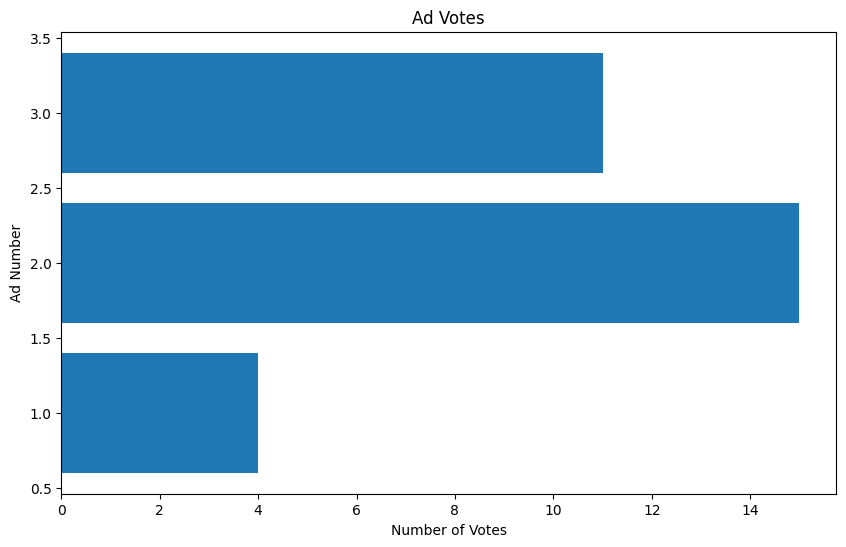

In [19]:
# Create a horizontal bar plot
plt.figure(figsize=(10, 6))
plt.barh(list(votes.keys()), list(votes.values()))
# Add labels and title
plt.xlabel('Number of Votes')
plt.ylabel('Ad Number')
plt.title('Ad Votes')
# Show the plot
plt.show()


Finally, we pick the winner ad.

In [20]:
# picks the most voted ad
winner = max(votes, key=votes.get)
winner

2